<a href="https://colab.research.google.com/github/rodrigoruizteodoro/Actividad_3Valores_Atipicos/blob/main/Actividad3_2(Valores_At%C3%ADpicos_por_Dataframe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [3]:
data2020=pd.read_excel("Gastos y costos 20-23.xlsx",skiprows=5,sheet_name='2020')
data2021=pd.read_excel("Gastos y costos 20-23.xlsx",skiprows=3,sheet_name='2021')
data2022=pd.read_excel("Gastos y costos 20-23.xlsx",skiprows=3,sheet_name='2022')
data2023=pd.read_excel("Gastos y costos 20-23.xlsx",skiprows=3,sheet_name='2023')

# **Data 2020**

In [13]:
#Nulos
print(data2020.isnull().sum())
print(data2020.info())

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
Columna1       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3342 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        3342 non-null   object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           3342 non-null   float64       
 9   IMPORTE      

In [5]:
#Sustituimos nulos

#Caulitativas
data2020["FOLIO"]=data2020["FOLIO"].fillna('Unknow')
data2020["GASTO"]=data2020["GASTO"].fillna('Unknow')
data2020["POLIZA"]=data2020["POLIZA"].fillna('Unknow')
data2020["TIPO"]=data2020["TIPO"].fillna('I')

#Cuantitativas
data2020["IMPORTE"]=data2020["IMPORTE"].fillna(round(data2020["IMPORTE"].mean(),1))
data2020["IVA"]=data2020["IVA"].fillna(round(data2020["IVA"].median(),1))
data2020["TC"]=data2020["TC"].fillna(1)
print(data2020.isnull().sum())


FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
Columna1       0
dtype: int64


In [6]:
#Seleccionamos solo las columnas de tipo float para hacer nuestro boxplot por df
data2020cuanti=data2020[["TC","IMPORTE","IVA","RET ISR","RET IVA","TOTAL MX","TOTAL SAT",'Columna1']]
data2020cuali=data2020[["FECHA","FOLIO","UUID","RFC","PROVEEDOR","TIPO GASTO","GASTO","DESCRIPCION","TIPO","STATUS","POLIZA"]]
print(data2020cuanti)
print(data2020cuanti.shape)
print(data2020cuali.shape)

       TC   IMPORTE      IVA  RET ISR  RET IVA  TOTAL MX  TOTAL SAT  Columna1
0     1.0      0.00  2248.28      0.0      0.0   2248.28   16300.00  14051.72
1     1.0    490.00    78.40      0.0      0.0    568.40     568.40      0.00
2     1.0    195.00    31.20      0.0      0.0    226.20     226.20      0.00
3     1.0  10694.25  1711.08      0.0      0.0  12405.33   12405.33      0.00
4     1.0      0.00    83.90      0.0      0.0      0.00       0.00      0.00
...   ...       ...      ...      ...      ...       ...        ...       ...
3337  1.0    129.79    20.21      0.0      0.0    150.00     150.00      0.00
3338  1.0   2284.80   365.57      0.0      0.0   2650.37    2650.37      0.00
3339  1.0    163.79    26.21      0.0      0.0    190.00     190.00      0.00
3340  1.0      0.00     0.00      0.0      0.0      0.00       0.00      0.00
3341  1.0  14889.29     0.00      0.0      0.0  14889.29   14889.29      0.00

[3342 rows x 8 columns]
(3342, 8)
(3342, 11)


<Figure size 1000x600 with 0 Axes>

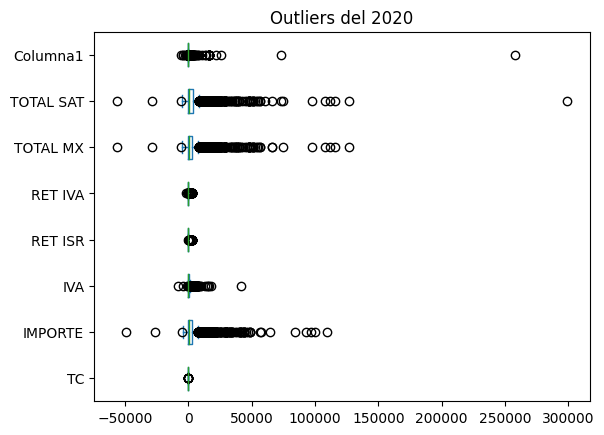

In [7]:
#Diagrama de caja y bigote
fig=plt.figure(figsize=(10,6))
data2020cuanti.plot(kind="box",vert=False)
plt.title("Outliers del 2020")
plt.show()

In [8]:
#Metodo de IQR
y=data2020cuanti
percentile25=y.quantile(0.25)#Q1
percentile75=y.quantile(0.75)#Q3

iqr=percentile75-percentile25

limite_sup=percentile75+1.5*iqr
limite_infe=percentile25-1.5*iqr

print("Limite superior: ",limite_sup)
print("Limite inferior: ",limite_infe)


Limite superior:  TC              1.00000
IMPORTE      7492.26375
IVA           946.69625
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7983.17750
TOTAL SAT    8269.28375
Columna1        0.00000
dtype: float64
Limite inferior:  TC              1.00000
IMPORTE     -4465.00625
IVA          -547.89375
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4783.14250
TOTAL SAT   -4832.96625
Columna1        0.00000
dtype: float64


In [9]:
#Obtenemos un df sin outliers
data2020cuanti2=data2020cuanti[(y<=limite_sup)&(y>=limite_infe)]

#Imprimimos los nuevos Outliers (nulos)
data2020cuanti2.isnull().sum()

TC             9
IMPORTE      400
IVA          460
RET ISR       45
RET IVA      253
TOTAL MX     420
TOTAL SAT    426
Columna1     240
dtype: int64

In [10]:
#Sacamos una copia
data2020cuanti3=data2020cuanti2.copy()
data2020cuanti3

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,NaN,0.0,0.0,2248.28,NaN,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,1.0,0.00,83.90,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [11]:
#Volvemos a reemplazar valores atipicos (nulos)

#Por la media
data2020cuanti3["IMPORTE"]=data2020cuanti3["IMPORTE"].fillna(round(data2020cuanti3["IMPORTE"].mean(),1))
data2020cuanti3["RET IVA"]=data2020cuanti3["RET IVA"].fillna(round(data2020cuanti3["RET IVA"].mean(),1))
data2020cuanti3["TOTAL MX"]=data2020cuanti3["TOTAL MX"].fillna(round(data2020cuanti3["TOTAL MX"].mean(),1))
data2020cuanti3["TOTAL SAT"]=data2020cuanti3["TOTAL SAT"].fillna(round(data2020cuanti3["TOTAL SAT"].mean(),1))

#Por la mediana
data2020cuanti3["IVA"]=data2020cuanti3["IVA"].fillna(round(data2020cuanti3["IVA"].median(),1))
data2020cuanti3["RET ISR"]=data2020cuanti3["RET ISR"].fillna(round(data2020cuanti3["RET ISR"].median(),1))

#Por la un número concreto
data2020cuanti3["TC"]=data2020cuanti3["TC"].fillna(1)
data2020cuanti3["Columna1"]=data2020cuanti3["Columna1"].fillna(0)

print(data2020cuanti3.isnull().sum())

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64


In [12]:
Datos_2020limpios = pd.concat([data2020cuali, data2020cuanti3], axis=1)
Datos_2020limpios.head(5)

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,Unknow,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,Unknow,1.0,0.0,68.2,0.0,0.0,2248.28,1333.0,0.0
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Unknow,COMISION COBRADA,I,Vigente,Unknow,1.0,490.0,78.4,0.0,0.0,568.40,568.4,0.0
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Unknow,COMISION COBRADA,I,Vigente,Unknow,1.0,195.0,31.2,0.0,0.0,226.20,226.2,0.0
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,Unknow,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,Unknow,1.0,1162.5,68.2,0.0,0.0,1239.10,1333.0,0.0
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Unknow,Pago,P,Vigente,Unknow,1.0,0.0,83.9,0.0,0.0,0.00,0.0,0.0


# **Data 2021**

In [23]:
#Nulos
print(data2021.isnull().sum())
print(data2021.info())

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        3035 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           3035 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   f

In [24]:
#Sustituimos nulos

#Caulitativas
data2021["POLIZA"]=data2021["POLIZA"].fillna('Unknow')
data2021["FOLIO"]=data2021["FOLIO"].fillna('Unknow')
data2021["MP"]=data2021["MP"].fillna(method="ffill")

print(data2021.isnull().sum())

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64


In [25]:
#Seleccionamos solo las columnas de tipo float y object para hacer nuestro boxplot por df
data2021cuanti=data2021[["TC","IMPORTE","IVA","RET ISR","RET IVA","TOTAL MX","TOTAL SAT"]]
data2021cuali=data2021[["FECHA","FOLIO","UUID","RFC","PROVEEDOR","TIPO GASTO",'DESCRIPCION','MP','TIPO','STATUS','POLIZA']]
print(data2021cuanti)
print(data2021cuanti.shape)
print(data2021cuali.shape)

       TC   IMPORTE     IVA  RET ISR  RET IVA  TOTAL MX  TOTAL SAT
0     1.0    490.00   78.40      0.0      0.0    568.40     568.40
1     1.0    345.00   55.20      0.0      0.0    400.20     400.20
2     1.0   3447.41  551.59      0.0      0.0   3999.00    3999.00
3     1.0   5551.38  888.22      0.0      0.0   6439.60    6439.60
4     1.0   5551.98  888.32      0.0      0.0   6440.30    6440.30
...   ...       ...     ...      ...      ...       ...        ...
3030  1.0      0.00    0.00      0.0      0.0      0.00       0.00
3031  1.0      0.00    0.00      0.0      0.0      0.00       0.00
3032  1.0  22826.46  705.58      0.0      0.0  23532.04   23532.04
3033  1.0      0.00    0.00      0.0      0.0      0.00       0.00
3034  1.0  15656.15    0.00      0.0      0.0  15656.15   15656.15

[3035 rows x 7 columns]
(3035, 7)
(3035, 11)


<Figure size 1000x600 with 0 Axes>

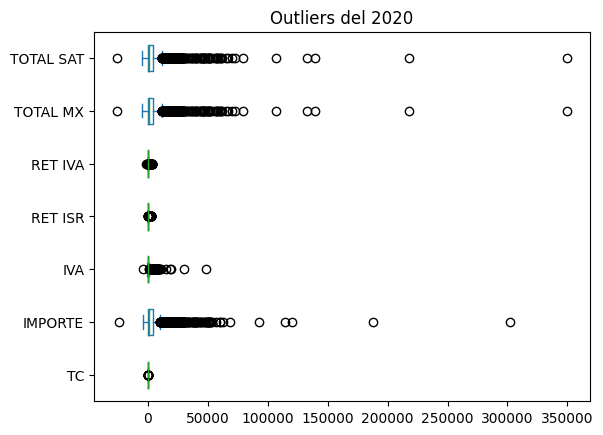

In [26]:
#Diagrama de caja y bigote
fig=plt.figure(figsize=(10,6))
data2021cuanti.plot(kind="box",vert=False)
plt.title("Outliers del 2021")
plt.show()

In [27]:
#Método Desviación Estandar
y=data2021cuanti
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64
Limite inferior permitido TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [28]:
#Obtenemos un df sin outliers
data2021cuanti2=data2021cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]

#Imprimimos los nuevos Outliers (nulos)
data2021cuanti2.isnull().sum()

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

In [29]:
#Sacamos una copia
data2021cuanti3=data2021cuanti2.copy()
data2021cuanti3

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [30]:
#Volvemos a reemplazar valores atipicos (nulos)

#Por la media
data2021cuanti3["IMPORTE"]=data2021cuanti3["IMPORTE"].fillna(round(data2020cuanti3["IMPORTE"].mean(),1))
data2021cuanti3["TOTAL MX"]=data2021cuanti3["TOTAL MX"].fillna(round(data2021cuanti3["TOTAL MX"].mean(),1))
data2021cuanti3["TOTAL SAT"]=data2021cuanti3["TOTAL SAT"].fillna(round(data2021cuanti3["TOTAL SAT"].mean(),1))

#Por la mediana
data2021cuanti3["RET ISR"]=data2021cuanti3["RET ISR"].fillna(round(data2021cuanti3["RET ISR"].median(),1))
data2021cuanti3["RET IVA"]=data2021cuanti3["RET IVA"].fillna(round(data2020cuanti3["RET IVA"].median(),1))
data2021cuanti3["IVA"]=data2021cuanti3["IVA"].fillna(round(data2021cuanti3["IVA"].median(),1))

#Por la un número concreto
data2021cuanti3["TC"]=data2021cuanti3["TC"].fillna(1)

print(data2021cuanti3.isnull().sum())

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


In [31]:
#Unimos dataframes
Datos_2021limpios = pd.concat([data2021cuali, data2021cuanti3], axis=1)
Datos_2021limpios.head(5)

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


# **Data 2022**

In [32]:
#Nulos
print(data2022.isnull().sum())
print(data2022.info())

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC   

In [33]:
#Sustituimos nulos

#Caulitativas
data2022["Folio"]=data2022["Folio"].fillna("Unknow")
data2022["Poliza"]=data2022["Poliza"].fillna('Unknow')
data2022["MP"]=data2022["MP"].fillna(method="ffill")

#Cuantitativas
data2022["TC"]=data2022["TC"].fillna(1)
data2022["Otros"]=data2022["Otros"].fillna(0)
print(data2022.isnull().sum())

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64


In [34]:
#Seleccionamos solo las columnas de tipo float para hacer nuestro boxplot por df
data2022cuanti=data2022[["TC","Importe","IVA","RET ISR","RET IVA","Otros","TOTAL SAT","TOTAL MX"]]
data2022cuali=data2022[["Fecha","Folio","UUID","RFC","Proveedor","TIPO GASTO","Descripción","MP","Tipo","Status","Poliza"]]
print(data2022cuali.shape)
print(data2022cuanti.shape)
print(data2022cuanti)

(2577, 11)
(2577, 8)
       TC   Importe     IVA  RET ISR  RET IVA  Otros  TOTAL SAT  TOTAL MX
0     1.0   5551.38  888.22      0.0      0.0    0.0    6439.60   6439.60
1     1.0   5551.98  888.32      0.0      0.0    0.0    6440.30   6440.30
2     1.0      0.00    0.00      0.0      0.0    0.0       0.00      0.00
3     1.0      0.00    0.00      0.0      0.0    0.0       0.00      0.00
4     1.0      0.00    0.00      0.0      0.0    0.0       0.00      0.00
...   ...       ...     ...      ...      ...    ...        ...       ...
2572  1.0      0.00    0.00      0.0      0.0    0.0       0.00      0.00
2573  1.0  17310.30  516.32      0.0      0.0    0.0   17826.62  17826.62
2574  1.0      0.00    0.00      0.0      0.0    0.0       0.00      0.00
2575  1.0      0.00    0.00      0.0      0.0    0.0       0.00      0.00
2576  1.0      0.00    0.00      0.0      0.0    0.0       0.00      0.00

[2577 rows x 8 columns]


<Figure size 1000x600 with 0 Axes>

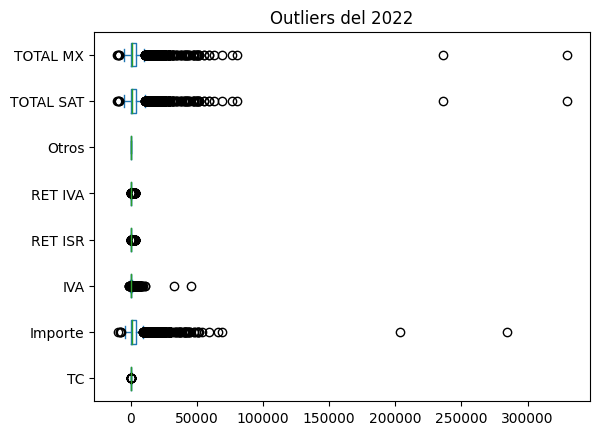

In [35]:
#Diagrama de caja y bigote
fig=plt.figure(figsize=(10,6))
data2022cuanti.plot(kind="box",vert=False)
plt.title("Outliers del 2022")
plt.show()

In [36]:
#Metodo de IQR
y=data2022cuanti
percentile25=y.quantile(0.25)#Q1
percentile75=y.quantile(0.75)#Q3

iqr=percentile75-percentile25

limite_sup=percentile75+1.5*iqr
limite_infe=percentile25-1.5*iqr

print("Limite superior: ",limite_sup)
print("Limite inferior: ",limite_infe)

Limite superior:  TC               1.000
Importe       9058.900
IVA           1031.150
RET ISR          0.000
RET IVA          0.000
Otros            0.000
TOTAL SAT    10485.475
TOTAL MX     10374.700
dtype: float64
Limite inferior:  TC              1.000
Importe     -5435.340
IVA          -618.690
RET ISR         0.000
RET IVA         0.000
Otros           0.000
TOTAL SAT   -6291.285
TOTAL MX    -6224.820
dtype: float64


In [37]:
#Obtenemos un df sin outliers
data2022cuanti2=data2022cuanti[(y<=limite_sup)&(y>=limite_infe)]

#Imprimimos los nuevos Outliers (nulos)
data2022cuanti2.isnull().sum()

TC            18
Importe      305
IVA          303
RET ISR       71
RET IVA       70
Otros          0
TOTAL SAT    288
TOTAL MX     291
dtype: int64

In [38]:
#Sacamos una copia
data2022cuanti3=data2022cuanti2.copy()
data2022cuanti3

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL SAT,TOTAL MX
0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2573,1.0,NaN,516.32,0.0,0.0,0.0,NaN,NaN
2574,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2575,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [39]:
#Volvemos a reemplazar valores atipicos (nulos)

data2022cuanti3["Importe"]=data2022cuanti3["Importe"].fillna(round(data2022cuanti3["Importe"].mean(),1))
data2022cuanti3["TOTAL MX"]=data2022cuanti3["TOTAL MX"].fillna(round(data2022cuanti3["TOTAL MX"].mean(),1))
data2022cuanti3["TOTAL SAT"]=data2022cuanti3["TOTAL SAT"].fillna(round(data2022cuanti3["TOTAL SAT"].mean(),1))

#Por la mediana
data2022cuanti3["IVA"]=data2022cuanti3["IVA"].fillna(round(data2022cuanti3["IVA"].median(),1))
data2022cuanti3["RET IVA"]=data2022cuanti3["RET IVA"].fillna(round(data2022cuanti3["RET IVA"].median(),1))
data2022cuanti3["RET ISR"]=data2022cuanti3["RET ISR"].fillna(round(data2022cuanti3["RET ISR"].median(),1))

#Por la un número concreto
data2022cuanti3["TC"]=data2022cuanti3["TC"].fillna(1)

print(data2022cuanti3.isnull().sum())

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL SAT    0
TOTAL MX     0
dtype: int64


In [40]:
Datos_2022limpios = pd.concat([data2022cuali, data2022cuanti3], axis=1)
Datos_2022limpios.head(5)

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL SAT,TOTAL MX
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,Unknow,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,Unknow,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,Unknow,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


# **Data 2023**

In [41]:
#Nulos
print(data2023.isnull().sum())
print(data2023.info())

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP     

In [43]:
#Sustituimos nulos

#Caulitativas
data2023["Folio"]=data2023["Folio"].fillna("Unknow")
data2023["Poliza"]=data2023["Poliza"].fillna('Unknow')
data2023["MP"]=data2023["MP"].fillna(method="bfill")
data2023["MP"]=data2023["MP"].fillna(method="ffill")
data2023["TIPO GASTO"]=data2023["TIPO GASTO"].fillna('COMPRAS')
#Cuantitativas
data2023["FP"]=data2023["FP"].fillna(1)
data2023["Otros"]=data2023["Otros"].fillna(0)
print(data2023.isnull().sum())

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64


In [45]:
#Seleccionamos solo las columnas de tipo float para hacer nuestro boxplot por df
data2023cuanti=data2023[["FP","TC","Importe","IVA","RET ISR","RET IVA","Otros","TOTAL SAT","TOTAL MX"]]
data2023cuali=data2023[["Fecha","Folio","UUID","RFC","Proveedor","TIPO GASTO","Descripción","MP","Tipo","Status","Poliza"]]
print(data2023cuali.shape)
print(data2023cuanti.shape)
print(data2023cuanti)

(397, 11)
(397, 9)
       FP   TC   Importe      IVA  RET ISR  RET IVA  Otros  TOTAL SAT  \
0     1.0  1.0      0.00     0.00      0.0      0.0    0.0       0.00   
1     1.0  1.0      0.00     0.00      0.0      0.0    0.0       0.00   
2    99.0  1.0   5551.38   888.22      0.0      0.0    0.0    6439.60   
3    99.0  1.0   5551.98   888.32      0.0      0.0    0.0    6440.30   
4    99.0  1.0   8454.37  1352.70      0.0      0.0    0.0    9807.07   
..    ...  ...       ...      ...      ...      ...    ...        ...   
392   3.0  1.0      0.00     0.00      0.0      0.0    0.0       0.00   
393   1.0  1.0    220.00     0.00      0.0      0.0    0.0     220.00   
394   3.0  1.0  18071.52   682.40      0.0      0.0    0.0   18753.92   
395   5.0  1.0  14472.32     0.00      0.0      0.0    0.0   14472.32   
396   1.0  1.0      0.00     0.00      0.0      0.0    0.0       0.00   

     TOTAL MX  
0        0.00  
1        0.00  
2     6439.60  
3     6440.30  
4     9807.07  
..      

<Figure size 1000x600 with 0 Axes>

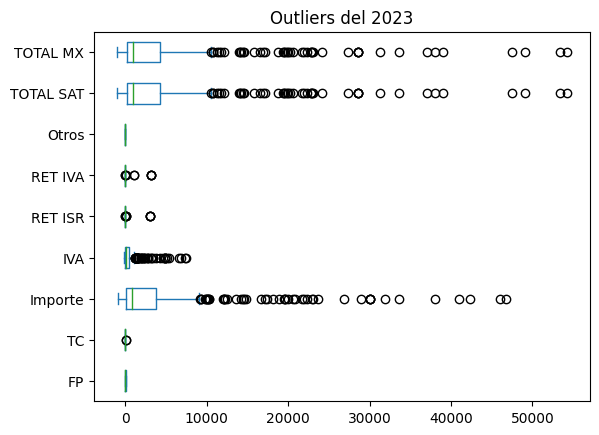

In [46]:
#Diagrama de caja y bigote
fig=plt.figure(figsize=(10,6))
data2023cuanti.plot(kind="box",vert=False)
plt.title("Outliers del 2023")
plt.show()

In [47]:
#Método Desviación Estandar
y=data2023cuanti
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             128.662512
TC               3.668614
Importe      19012.975667
IVA           2673.653205
RET ISR        631.122052
RET IVA        694.205739
Otros            0.000000
TOTAL SAT    20930.029605
TOTAL MX     20930.029605
dtype: float64
Limite inferior permitido FP             -56.042865
TC              -1.485501
Importe     -11164.098287
IVA          -1678.832802
RET ISR       -569.089759
RET IVA       -618.858283
Otros            0.000000
TOTAL SAT   -12223.711570
TOTAL MX    -12223.711570
dtype: float64


In [48]:
#Obtenemos un df sin outliers
data2023cuanti2=data2023cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]

#Imprimimos los nuevos Outliers (nulos)
data2023cuanti2.isnull().sum()

FP            0
TC            2
Importe      25
IVA          18
RET ISR       4
RET IVA       6
Otros         0
TOTAL SAT    22
TOTAL MX     22
dtype: int64

In [49]:
#Sacamos una copia
data2023cuanti3=data2023cuanti2.copy()
data2023cuanti3

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL SAT,TOTAL MX
0,1.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
1,1.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32


In [50]:
#Volvemos a reemplazar valores atipicos (nulos)

#Por la media
data2023cuanti3["Importe"]=data2023cuanti3["Importe"].fillna(round(data2023cuanti3["Importe"].mean(),1))
data2023cuanti3["TOTAL MX"]=data2023cuanti3["TOTAL MX"].fillna(round(data2023cuanti3["TOTAL MX"].mean(),1))
data2023cuanti3["TOTAL SAT"]=data2023cuanti3["TOTAL SAT"].fillna(round(data2023cuanti3["TOTAL SAT"].mean(),1))

#Por la mediana
data2023cuanti3["RET ISR"]=data2023cuanti3["RET ISR"].fillna(round(data2023cuanti3["RET ISR"].median(),1))
data2023cuanti3["RET IVA"]=data2023cuanti3["RET IVA"].fillna(round(data2023cuanti3["RET IVA"].median(),1))
data2023cuanti3["IVA"]=data2023cuanti3["IVA"].fillna(round(data2023cuanti3["IVA"].median(),1))

#Por la un número concreto
data2023cuanti3["TC"]=data2023cuanti3["TC"].fillna(1)

print(data2023cuanti3.isnull().sum())

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL SAT    0
TOTAL MX     0
dtype: int64


In [51]:
#Unimos dataframes
Datos_2023limpios = pd.concat([data2023cuali, data2023cuanti3], axis=1)
Datos_2023limpios.head(5)

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL SAT,TOTAL MX
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,P,Vigente,Unknow,1.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,P,Vigente,Unknow,1.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07


# **Exportamos CSV**

In [52]:
#Convertir a csv
Datos_2020limpios.to_csv("Datos_2020limpios.csv")
Datos_2021limpios.to_csv("Datos_2021limpios.csv")
Datos_2022limpios.to_csv("Datos_2022limpios.csv")
Datos_2023limpios.to_csv("Datos_2023limpios.csv")

In [53]:
#descargar archivo filtrado en csv
from google.colab import files

files.download("Datos_2020limpios.csv")
files.download("Datos_2021limpios.csv")
files.download("Datos_2022limpios.csv")
files.download("Datos_2023limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>